In [ ]:
%tensorflow_version 2.x


TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf
from keras import layers
from tensorflow import keras
import numpy as np

Using TensorFlow backend.


In [ ]:
cifar = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar.load_data()

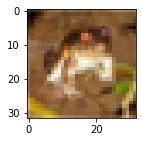

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[0], cmap="Greys_r")

In [ ]:
data2 = tf.data.Dataset.from_tensor_slices((tf.reshape(x_train,[-1,32,32,3])/255,y_train))

In [ ]:
data = data2.shuffle(buffer_size=30000).batch(128).repeat(300)
test_data = x_test.reshape([-1, 32, 32, 3]).astype(np.float32) / 255
test_lbl = y_test.astype(np.int32)

In [ ]:
def model(batch_size):
  layers = [keras.layers.Flatten(input_shape=(32,32,3),batch_size=batch_size),
            keras.layers.Dense(128,activation="relu"),
            keras.layers.Dense(64,activation='relu'),
            keras.layers.Dense(3072,activation="sigmoid"),
            keras.layers.Flatten()]
  return keras.Sequential(layers)

**For Neuralnetwork**

In [ ]:

def training(loss_fn2,train_acc_metric2,model):
  training_steps = 1000
  opt = tf.optimizers.Adam(learning_rate=.001)
  loss_fn = loss_fn2
  train_acc_metric = train_acc_metric2
  for step,(img_batch,lbl_batch) in enumerate(data):
    with tf.GradientTape() as tape:
      logits = model(img_batch)
      xent = loss_fn(tf.reshape(img_batch,[-1,3072]),logits)
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
    opt.apply_gradients(zip(grads, varis))

    train_acc_metric(lbl_batch, logits)
    if not step % 5:
      print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
      train_acc_metric.reset_states()
  

In [ ]:
# training(loss_fn1,train_acc_metric1,model(128))

**AutoEncoder**


*   tf.losses.MeanSquaredError()

*   tf.keras.metrics.MeanSquaredError()



In [ ]:
def model_cnn(batch_size):
  layers = [keras.layers.Input(shape=(32,32,3),batch_size=batch_size),
            keras.layers.Conv2D(32,3,padding='valid',activation="relu"),
            keras.layers.Conv2D(32,3,padding='same',activation="relu"),
            keras.layers.MaxPooling2D(),
            keras.layers.Conv2D(64,3,activation='relu'),
            keras.layers.MaxPooling2D(),
            keras.layers.Dropout(.25),
            keras.layers.Conv2D(128,3,activation='relu'),
            keras.layers.UpSampling2D(),
            keras.layers.Conv2D(64,3,padding='same',activation='relu'),
            keras.layers.UpSampling2D(),
            keras.layers.Dropout(.25),
            keras.layers.Conv2D(32,3,padding='same',activation='relu'),
            keras.layers.UpSampling2D(),
            keras.layers.Conv2D(3,3,padding='same',activation='sigmoid')
            ]
  return keras.Sequential(layers)


In [ ]:
loss_fn1 = tf.losses.MeanSquaredError()
train_acc_metric1 = tf.keras.metrics.MeanSquaredError()
def training_cnn(loss_fn2,train_acc_metric2,model):
  training_steps = 1000
  opt = tf.optimizers.Adam(learning_rate=.001)
  loss_fn = loss_fn2
  train_acc_metric = train_acc_metric2
  for step,(img_batch,lbl_batch) in enumerate(data):
    with tf.GradientTape() as tape:
      logits = model(img_batch)
      xent = loss_fn(img_batch,logits)
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
    opt.apply_gradients(zip(grads, varis))
    train_acc_metric(img_batch, logits)
    if not step % 100:
      print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
      train_acc_metric.reset_states()
  

In [ ]:
model = model_cnn(128)
training_cnn(loss_fn1,train_acc_metric1,model)

Loss: 0.06489410251379013 Accuracy: 0.06489410251379013
Loss: 0.02567388489842415 Accuracy: 0.03688529506325722
Loss: 0.02422798052430153 Accuracy: 0.024039294570684433
Loss: 0.019758034497499466 Accuracy: 0.020636701956391335
Loss: 0.017546892166137695 Accuracy: 0.018166447058320045
Loss: 0.015378812327980995 Accuracy: 0.01656343974173069
Loss: 0.015959810465574265 Accuracy: 0.015332203358411789
Loss: 0.01546432077884674 Accuracy: 0.014711813069880009
Loss: 0.013479698449373245 Accuracy: 0.013892416842281818
Loss: 0.013312693685293198 Accuracy: 0.013509321957826614
Loss: 0.01319532748311758 Accuracy: 0.013259287923574448
Loss: 0.01509890891611576 Accuracy: 0.012731125578284264
Loss: 0.011633035726845264 Accuracy: 0.012502234429121017
Loss: 0.011825261637568474 Accuracy: 0.012195063754916191
Loss: 0.011891407892107964 Accuracy: 0.011834281496703625
Loss: 0.010639123618602753 Accuracy: 0.011687230318784714
Loss: 0.011956097558140755 Accuracy: 0.01150878332555294
Loss: 0.0116479415446519

KeyboardInterrupt: ignored

**create a model to visualize the output for 1 img**

In [ ]:
 model_vis = model_cnn(1)

In [ ]:
model_vis.set_weights(model.get_weights())

In [ ]:
for step,(img_batch,lbl_batch) in enumerate(data):
 print(img_batch[0].shape)
 m = model_vis(tf.reshape(img_batch[0],(1,32,32,3)))
 break

(32, 32, 3)


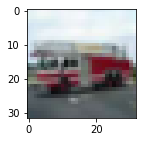

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(img_batch[3], cmap="Greys_r")

output the image from the model

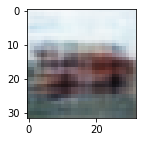

In [ ]:
m = model_vis.predict(tf.reshape(img_batch[3],[-1,32,32,3]))
plt.figure(figsize=(2,2))
plt.imshow(m[0], cmap="Greys_r")

output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7


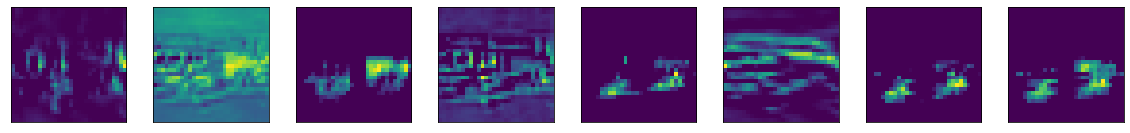

output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7


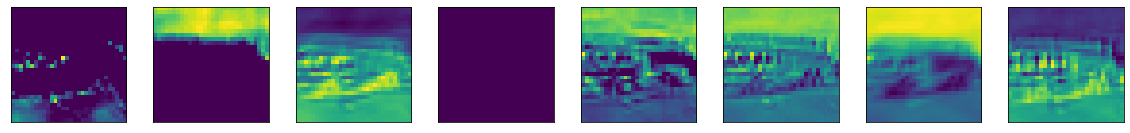

output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7


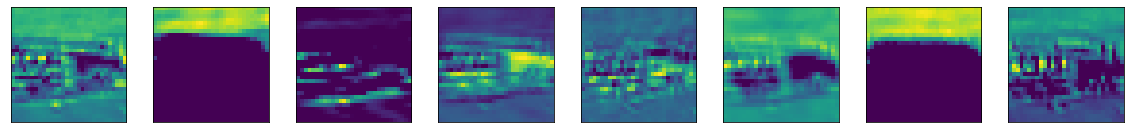

output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7
output of layer conv2d_7


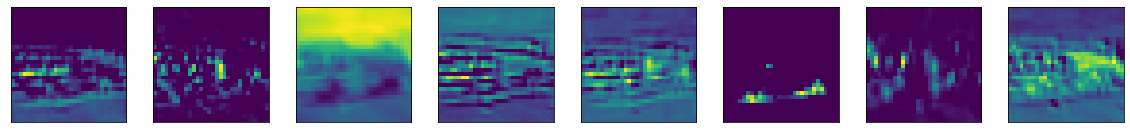

output of layer conv2d_7
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8


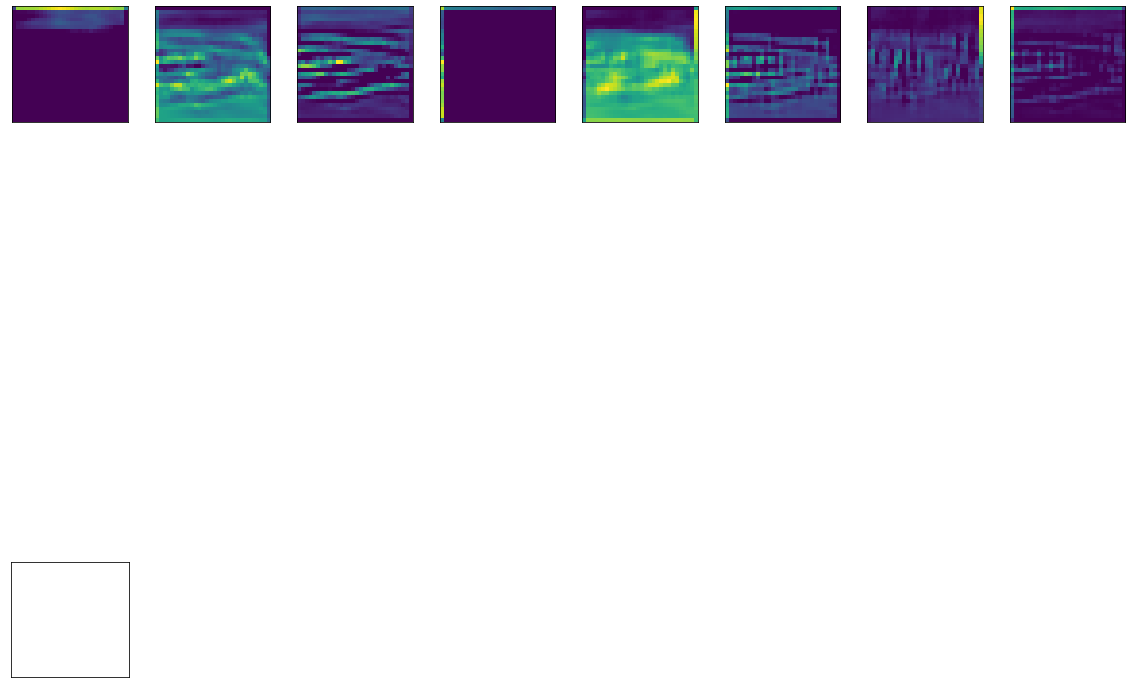

output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8


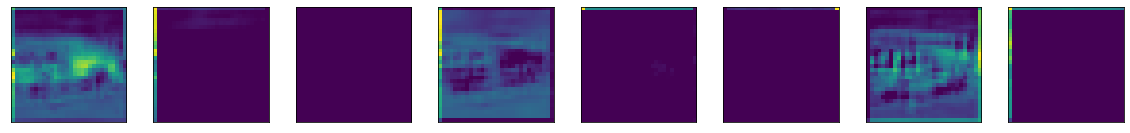

output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8


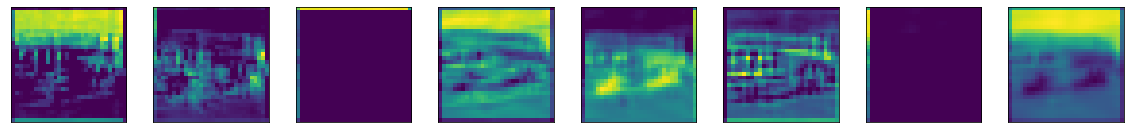

output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8
output of layer conv2d_8


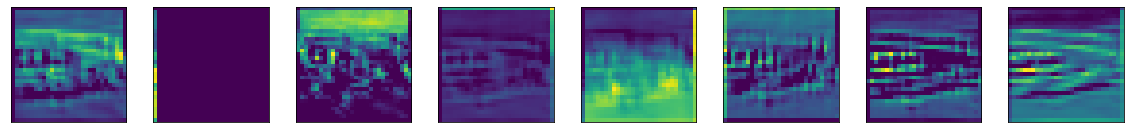

output of layer conv2d_8
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9


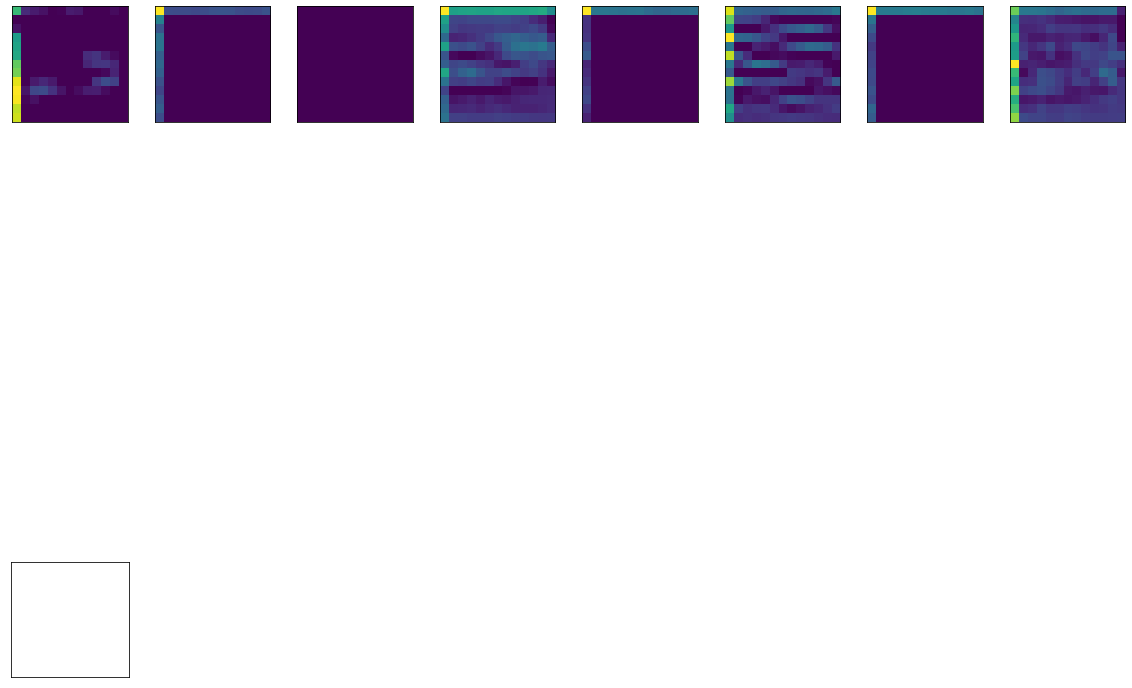

output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9


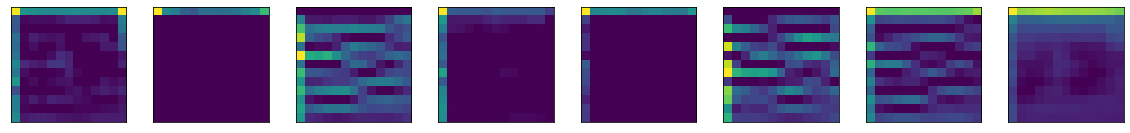

output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9


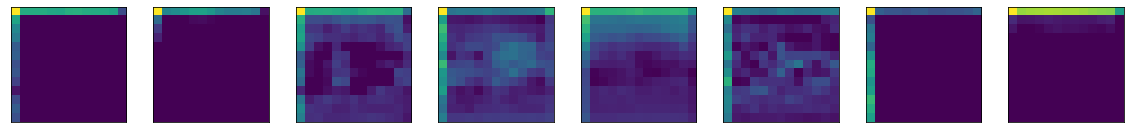

output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9


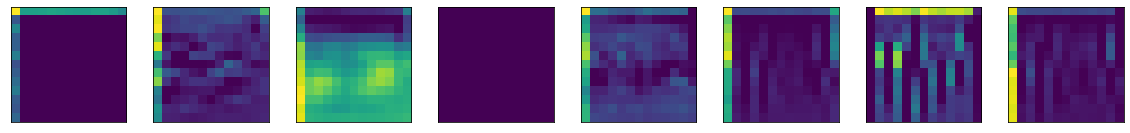

output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9


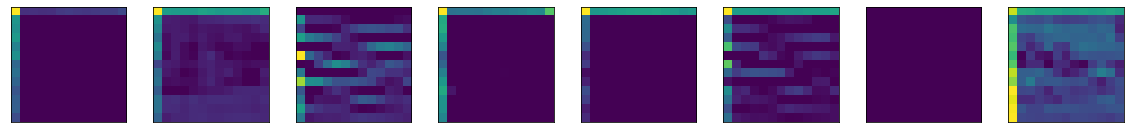

output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9


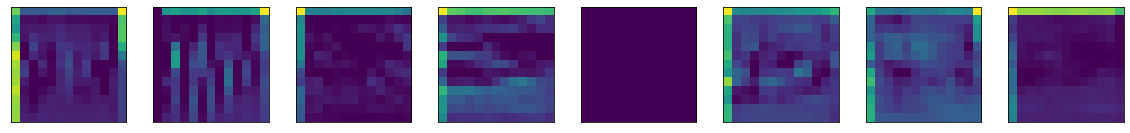

output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9


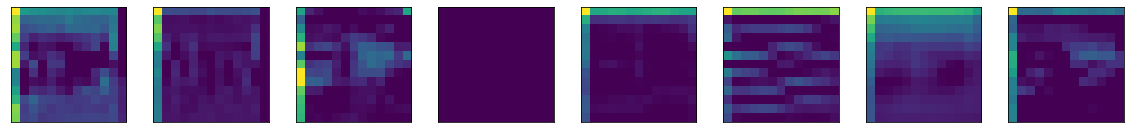

output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9
output of layer conv2d_9


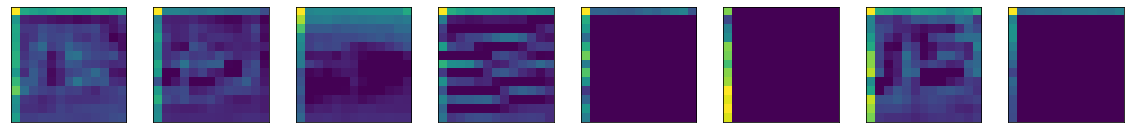

output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10


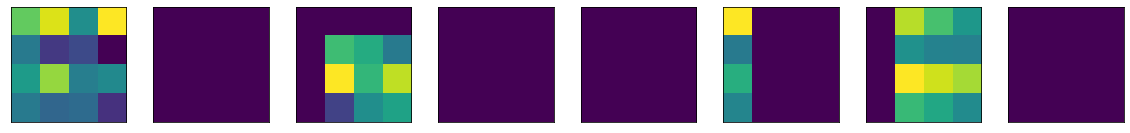

output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10


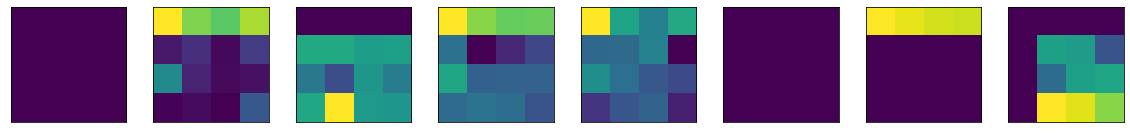

output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10


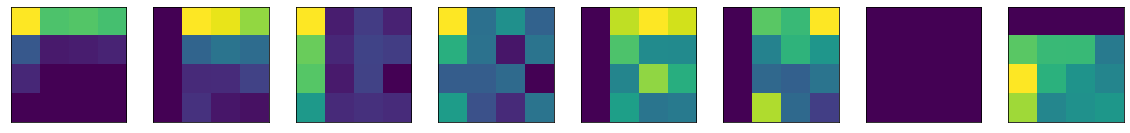

output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10


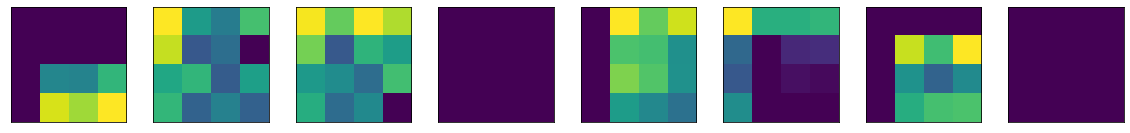

output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10


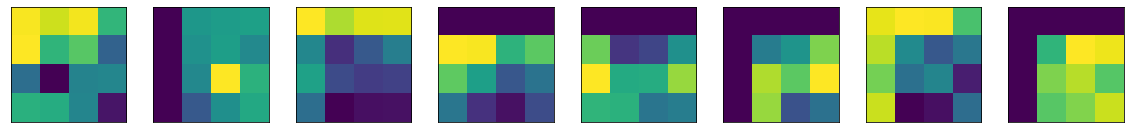

output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10


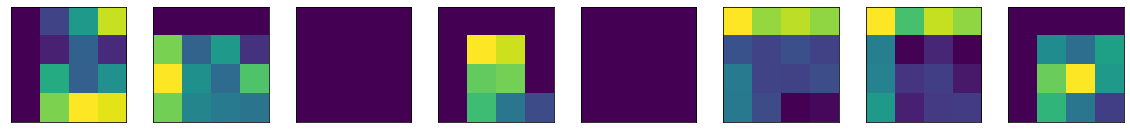

output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10


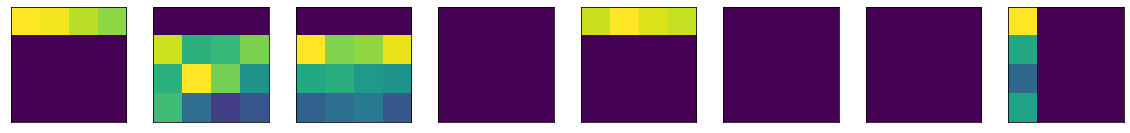

output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10
output of layer conv2d_10


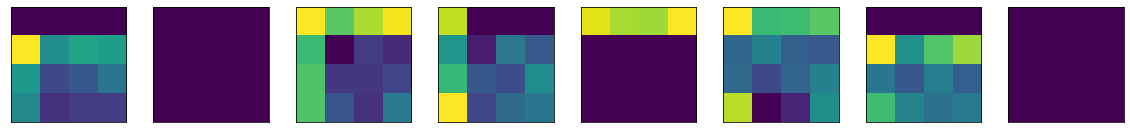

output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11


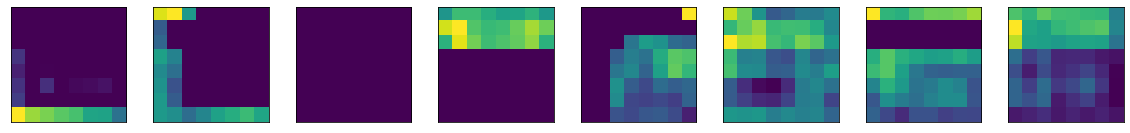

output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11


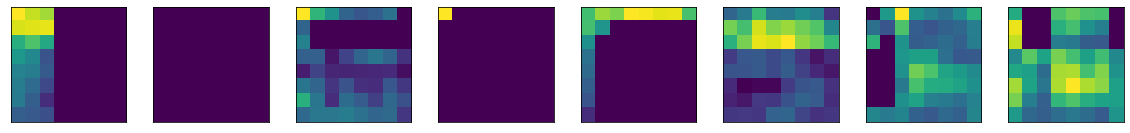

output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11


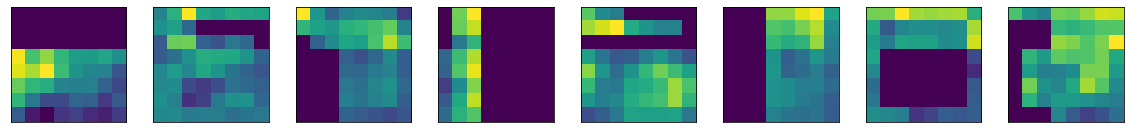

output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11


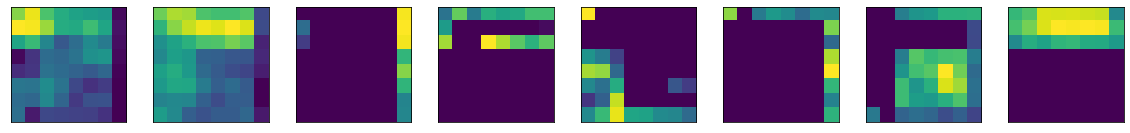

output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11


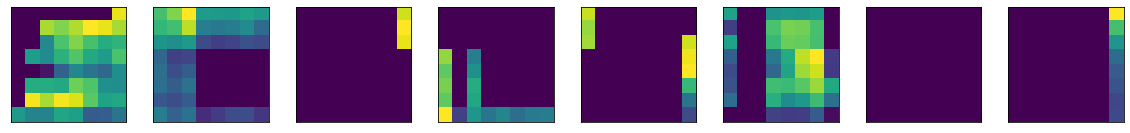

output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11


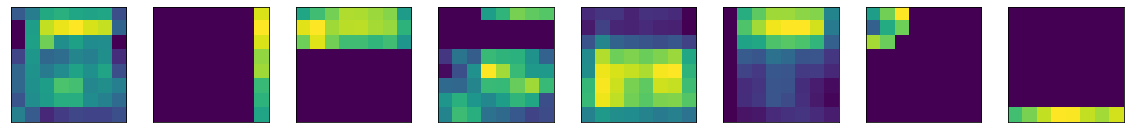

output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11


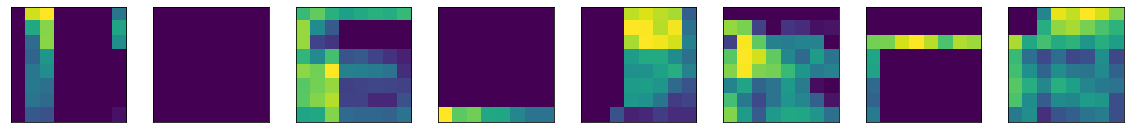

output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11
output of layer conv2d_11


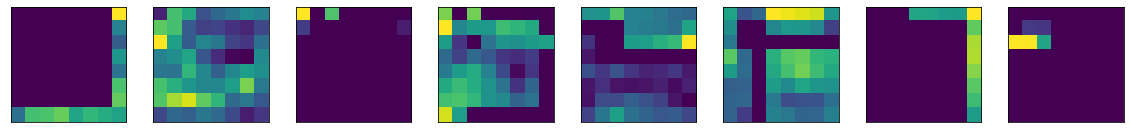

output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12


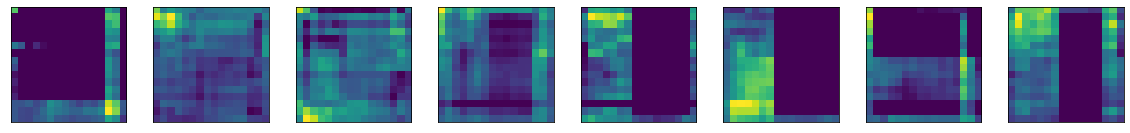

output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12


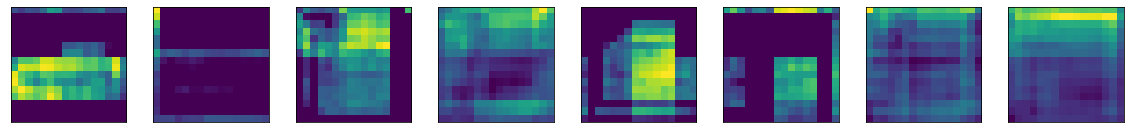

output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12


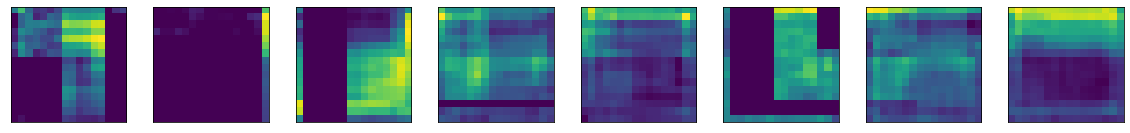

output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12
output of layer conv2d_12


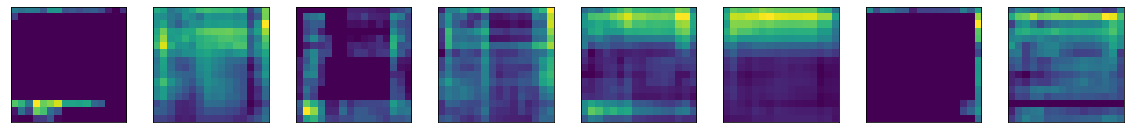

output of layer conv2d_12
output of layer conv2d_13
output of layer conv2d_13
output of layer conv2d_13
output of layer conv2d_13


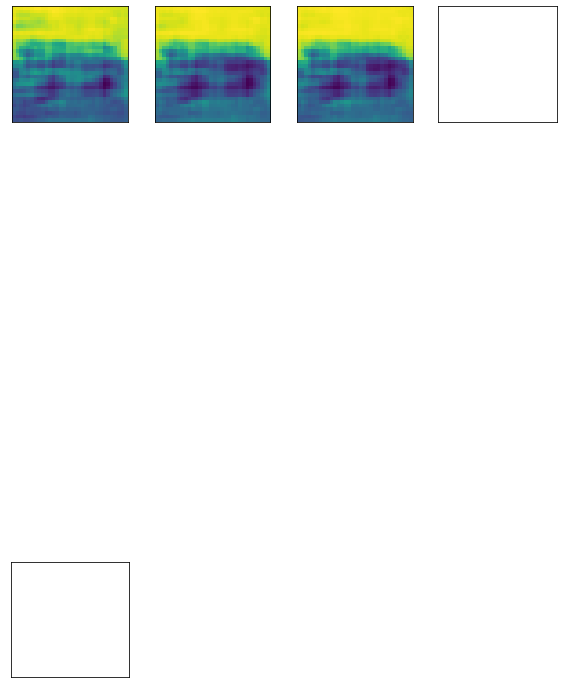

In [ ]:
from keras.models import Model
from keras.layers import Input
layer_dict = dict([(layer.name, layer) for layer in model_vis.layers])
plt.rcParams["figure.figsize"] = (20,20)

for layer in model_vis.layers:
	out = layer.output
	model = tf.compat.v1.keras.Model(model_vis.input,out)
	m = model.predict(tf.reshape(img_batch[3],[-1,32,32,3]))
	square = 8
	index = 1
	try:
		if 'conv2d' in layer.name:
			for _ in range(square):
				for _ in range(square):
					print('output of layer',layer.name)
					ax = plt.subplot(square, square, index)
					ax.set_xticks([])
					ax.set_yticks([])

					plt.imshow(m[0, :, :, index-1], cmap='viridis')
					index += 1
				plt.show()
	except:
		 continue

Function to create model with same achitecture of encoder

In [ ]:
def model_cnn1(batch_size,trainable):
  layers = [keras.layers.Input(shape=(32,32,3),batch_size=batch_size),
            keras.layers.Conv2D(32,3,padding='valid',activation="relu",trainable=trainable),
            keras.layers.Conv2D(32,3,padding='same',activation="relu",trainable=trainable),
            keras.layers.MaxPooling2D(),
            keras.layers.Conv2D(64,3,activation='relu',trainable=trainable),
            keras.layers.MaxPooling2D(),
            keras.layers.Dropout(.25),
            keras.layers.Conv2D(128,3,activation='relu',trainable=trainable)
            ]
  return keras.Sequential(layers)


In [ ]:
model_auto_false= model_cnn1(128,False)

model.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(1, 32, 32, 3)]          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (1, 30, 30, 32)           896       
_________________________________________________________________
conv2d_8 (Conv2D)            (1, 30, 30, 32)           9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (1, 15, 15, 32)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (1, 13, 13, 64)           18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (1, 6, 6, 64)             0         
_________________________________________________________________
dropout_2 (Dropout)          (1, 6, 6, 64)             0  

Set the weights for the encoder part

In [ ]:
model_auto_false.set_weights(model.get_weights()[0:8])
model_auto_false.add(keras.layers.Flatten())
model_auto_false.add(keras.layers.Dense(10,activation='sigmoid'))
model_auto_false.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (128, 30, 30, 32)         896       
_________________________________________________________________
conv2d_15 (Conv2D)           (128, 30, 30, 32)         9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (128, 15, 15, 32)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (128, 13, 13, 64)         18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (128, 6, 6, 64)           0         
_________________________________________________________________
dropout_4 (Dropout)          (128, 6, 6, 64)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (128, 4, 4, 128)         

In [ ]:
data1 = data2.shuffle(10000).take(128)
for i,j in data1:
  print(np.unique(j,axis=0,return_counts=True))
data1 = data1.batch(128).repeat(1000)

loss_fn1 =tf.losses.SparseCategoricalCrossentropy(from_logits=True)
train_acc_metric1 = tf.keras.metrics.SparseCategoricalAccuracy()
def training_cnn_classification(loss_fn2,train_acc_metric2,model):
  training_steps = 10000
  opt = tf.optimizers.Adam(learning_rate=.001)
  print(model.summary())
  for step,(img_batch,lbl_batch) in enumerate(data1):
    with tf.GradientTape() as tape:
      logits = model(img_batch)
      xent = loss_fn2(lbl_batch,logits)
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
    opt.apply_gradients(zip(grads, varis))
    train_acc_metric2(lbl_batch, logits)
    if not step % 100:
      print("Loss: {} Accuracy: {}".format(xent, train_acc_metric2.result()))
      train_acc_metric2.reset_states()

  

(array([1], dtype=uint8), array([1]))
(array([8], dtype=uint8), array([1]))
(array([0], dtype=uint8), array([1]))
(array([5], dtype=uint8), array([1]))
(array([3], dtype=uint8), array([1]))
(array([1], dtype=uint8), array([1]))
(array([8], dtype=uint8), array([1]))
(array([6], dtype=uint8), array([1]))
(array([0], dtype=uint8), array([1]))
(array([2], dtype=uint8), array([1]))
(array([0], dtype=uint8), array([1]))
(array([0], dtype=uint8), array([1]))
(array([7], dtype=uint8), array([1]))
(array([3], dtype=uint8), array([1]))
(array([5], dtype=uint8), array([1]))
(array([9], dtype=uint8), array([1]))
(array([8], dtype=uint8), array([1]))
(array([1], dtype=uint8), array([1]))
(array([3], dtype=uint8), array([1]))
(array([6], dtype=uint8), array([1]))
(array([7], dtype=uint8), array([1]))
(array([7], dtype=uint8), array([1]))
(array([0], dtype=uint8), array([1]))
(array([2], dtype=uint8), array([1]))
(array([7], dtype=uint8), array([1]))
(array([3], dtype=uint8), array([1]))
(array([0], 

Freezing the encoder

In [ ]:
training_cnn_classification(loss_fn1,train_acc_metric1,model_auto_false)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (128, 30, 30, 32)         896       
_________________________________________________________________
conv2d_15 (Conv2D)           (128, 30, 30, 32)         9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (128, 15, 15, 32)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (128, 13, 13, 64)         18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (128, 6, 6, 64)           0         
_________________________________________________________________
dropout_4 (Dropout)          (128, 6, 6, 64)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (128, 4, 4, 128)         

In [ ]:
def accuracy(model):
  true_pred = 0
  acc=0
  count5,count1,count9 = 0,0,0
  predict = model.predict(test_data)
  predict = np.argmax(predict,axis=-1)
  for i in range(len(test_lbl)):
    if(test_lbl[i]==predict[i]):
      true_pred+=1
      if(test_lbl[i]==5):
        count5=count5+1
      if(test_lbl[i]==1):
        count1=count1+1
      if(test_lbl[i]==9):
        count9=count9+1
  acc = true_pred/len(test_lbl)
  print(acc)
  print(count1,count5,count9)


In [ ]:
accuracy(model_auto_false)

0.3963
486 304 446


In [ ]:
model_auto_True= model_cnn1(128,True)
model_auto_True.set_weights(model.get_weights()[0:8])
model_auto_True.add(keras.layers.Flatten())
model_auto_True.add(keras.layers.Dense(10,activation='sigmoid'))
model_auto_True.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (128, 30, 30, 32)         896       
_________________________________________________________________
conv2d_67 (Conv2D)           (128, 30, 30, 32)         9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (128, 15, 15, 32)         0         
_________________________________________________________________
conv2d_68 (Conv2D)           (128, 13, 13, 64)         18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (128, 6, 6, 64)           0         
_________________________________________________________________
dropout_17 (Dropout)         (128, 6, 6, 64)           0         
_________________________________________________________________
conv2d_69 (Conv2D)           (128, 4, 4, 128)        

Non Freezed encoder

In [ ]:
training_cnn_classification(loss_fn1,train_acc_metric1,model_auto_True)
accuracy(model_auto_True)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (128, 30, 30, 32)         896       
_________________________________________________________________
conv2d_67 (Conv2D)           (128, 30, 30, 32)         9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (128, 15, 15, 32)         0         
_________________________________________________________________
conv2d_68 (Conv2D)           (128, 13, 13, 64)         18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (128, 6, 6, 64)           0         
_________________________________________________________________
dropout_17 (Dropout)         (128, 6, 6, 64)           0         
_________________________________________________________________
conv2d_69 (Conv2D)           (128, 4, 4, 128)        

In [ ]:
accuracy(model_auto_True)

0.539
333


In [ ]:
model_auto_True_scratch= model_cnn1(128,True)
model_auto_True_scratch.add(keras.layers.Flatten())
model_auto_True_scratch.add(keras.layers.Dense(10,activation='sigmoid'))

training_cnn_classification(loss_fn1,train_acc_metric1,model_auto_True_scratch)
accuracy(model_auto_True_scratch)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (128, 30, 30, 32)         896       
_________________________________________________________________
conv2d_71 (Conv2D)           (128, 30, 30, 32)         9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (128, 15, 15, 32)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (128, 13, 13, 64)         18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (128, 6, 6, 64)           0         
_________________________________________________________________
dropout_18 (Dropout)         (128, 6, 6, 64)           0         
_________________________________________________________________
conv2d_73 (Conv2D)           (128, 4, 4, 128)        

In [ ]:
accuracy(model_auto_True_scratch)

0.5019
729 207 555




*   freezed : 0.3033,0.2961,.3164(256 samples),.31 , .387(shuffle=10000),.3963(shuffle = 10000,128 samples)

*   unfreezed : 0.3161,0.3098,.3559(256 samples),.34,.57(shuffle=10000),.539(shuffle = 10000,128 samples)

*   Scratch : 0.3031,0.3169,.3411(256 samples),,337,.56(shuffle=10000),.501(shuffle = 10000,128 samples)

0:15
1:9
2:13
3:15
4:15
5:7
6:14
7:17
8:19
9:4


5 predicted:  for minority class=(1,5,9)
model1: 486 304 446
model2: 639 495 677
model3: 729 207 555


